In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns

In [2]:
# Data Collection:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\ProductionDataupdated1.csv'
ProductionTank = pd.read_csv(file_path)

In [2]:
ProductionTank.head()

NameError: name 'ProductionTank' is not defined

In [1]:
ProductionTank.drop(columns=['Unnamed: 0'], inplace=True)

NameError: name 'ProductionTank' is not defined

In [4]:
## 'STEP1_AGITATION', 'STEP2_AGITATION','STEP3_AGITATION'  - Effect of Agitation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


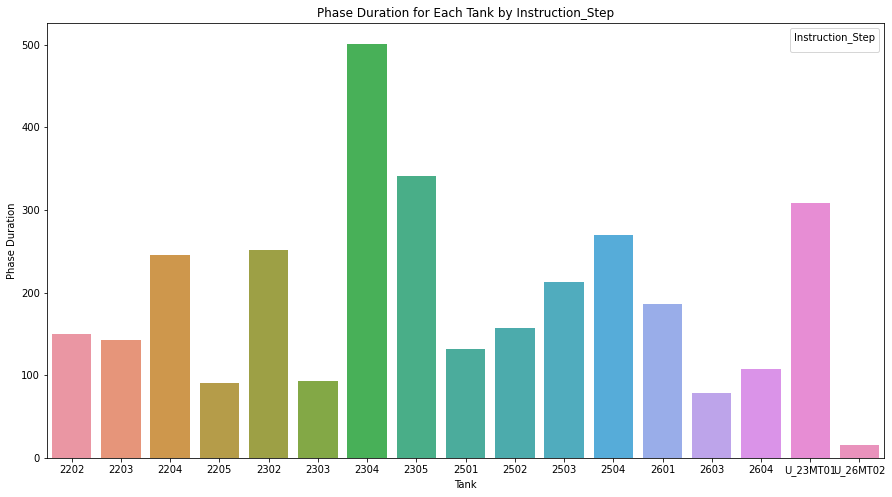

In [5]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)


# Filter the dataframe for desired instruction steps
desired_steps = ['STEP1_AGITATION', 'STEP2_AGITATION','STEP3_AGITATION']

filtered_data = data[data['Instruction_Step'].isin(desired_steps)]

# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'Material'])['Phase_duration'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))

# Visualization using bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=total_durations, x='Tank_1', y='Phase_duration', ci=None)
plt.title('Phase Duration for Each Tank by Instruction_Step')
plt.ylabel('Phase Duration')
plt.xlabel('Tank')
plt.legend(title='Instruction_Step')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


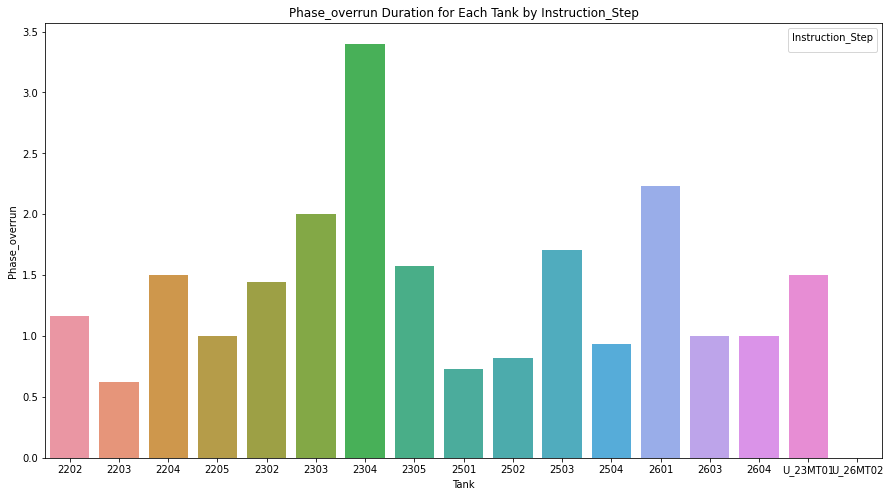

       Tank_1  Material    BATCHID  Phase_duration  Phase_overrun  \
0        2202   1397022  107956670              51            1.0   
1        2202   1428047  107993270              35            0.0   
2        2202   1428047  108033603              50            0.0   
3        2202   1451704  108073632              61            1.0   
4        2202   1520984  108045117              90            0.0   
..        ...       ...        ...             ...            ...   
333  U_23MT01   1775253  107755257              90            0.0   
334  U_23MT01   1775253  107771597              91            1.0   
335  U_23MT01   1775253  107833745              91            1.0   
336  U_23MT01   1775253  108067817              90            0.0   
337  U_26MT02   1368236  107761709              16            0.0   

     Phase_start_delay  Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  
0                    1             0.0              16.666667              NaN  
1        

In [6]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)


# Filter the dataframe for desired instruction steps
desired_steps = ['STEP1_AGITATION', 'STEP2_AGITATION','STEP3_AGITATION']

filtered_data = data[data['Instruction_Step'].isin(desired_steps)]

# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'Material'])['Phase_overrun'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))

# Visualization using bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=total_durations, x='Tank_1', y='Phase_overrun', ci=None)
plt.title('Phase_overrun Duration for Each Tank by Instruction_Step')
plt.ylabel('Phase_overrun')
plt.xlabel('Tank')
plt.legend(title='Instruction_Step')
plt.show()
#'Instruction_Step'

#Aggregate data per tank
aggregated_total_durations_df1 = filtered_data.groupby(['Tank_1','Material','BATCHID']).agg({
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    #'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()

 #Print the aggregated DataFrame
print(aggregated_total_durations_df1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


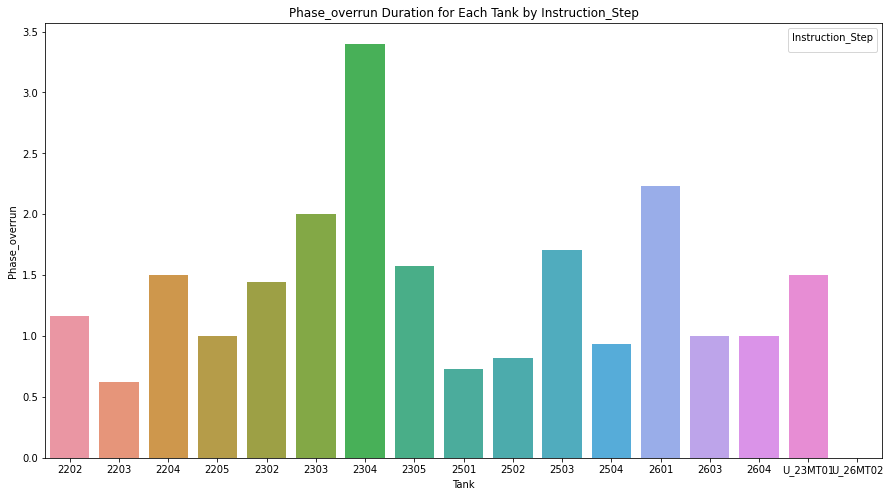

       Tank_1    BATCHID  Material  Phase_duration  Phase_overrun  \
0        2202  107867810   1648637              51            1.0   
1        2202  107899926   1775253              90            0.0   
2        2202  107949892   1775253             120            0.0   
3        2202  107956670   1397022              51            1.0   
4        2202  107963677   1775253              31            1.0   
..        ...        ...       ...             ...            ...   
333  U_23MT01  107787543   1520984              90            0.0   
334  U_23MT01  107833745   1775253              91            1.0   
335  U_23MT01  107856519   1451710              95            0.0   
336  U_23MT01  108067817   1775253              90            0.0   
337  U_26MT02  107761709   1368236              16            0.0   

     Phase_start_delay  Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  
0                    0             0.0              16.666667              NaN  
1        

In [7]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)


# Filter the dataframe for desired instruction steps
desired_steps = ['STEP1_AGITATION', 'STEP2_AGITATION','STEP3_AGITATION']

filtered_data = data[data['Instruction_Step'].isin(desired_steps)]

# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'Material'])['Phase_overrun'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))

# Visualization using bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=total_durations, x='Tank_1', y='Phase_overrun', ci=None)
plt.title('Phase_overrun Duration for Each Tank by Instruction_Step')
plt.ylabel('Phase_overrun')
plt.xlabel('Tank')
plt.legend(title='Instruction_Step')
plt.show()
#'Instruction_Step'

#Aggregate data per tank
aggregated_total_durations_df1 = filtered_data.groupby(['Tank_1','BATCHID','Material']).agg({
  #  'BATCHID': 'count',
    # 'Material': 'count',
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    #'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()

 #Print the aggregated DataFrame
print(aggregated_total_durations_df1)

In [8]:
#data = pd.DataFrame(ProductionTank) 
# Count the unique materialsProductionTank produced by each tank
Batch_counts =ProductionTank.groupby('Tank_1')['BATCHID'].nunique().reset_index()
print(Batch_counts)


      Tank_1  BATCHID
0       2202       24
1       2203       25
2       2204       24
3       2205       27
4       2302       57
5       2303       57
6       2304       48
7       2305       57
8       2501       51
9       2502       49
10      2503       97
11      2504       99
12      2601       43
13      2603       36
14      2604       28
15  U_22MT01       37
16  U_23MT01       58
17  U_26MT02       32


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


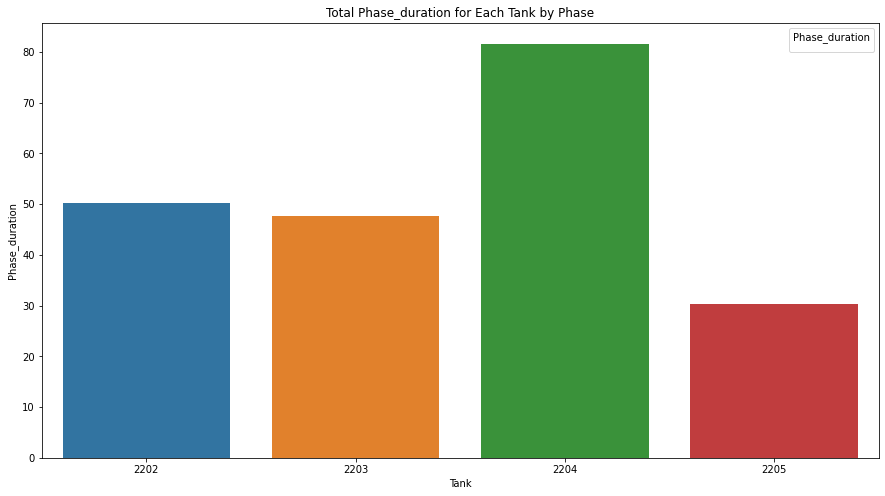

   Tank_1  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0    2202   1397022              51            1.0                  1   
1    2202   1428047              85            0.0               3582   
2    2202   1451704              61            1.0                  1   
3    2202   1520984              90            0.0                  1   
4    2202   1648637             102            2.0                  2   
5    2202   1775253             513            3.0                  5   
6    2203   1397022              50            0.0                  1   
7    2203   1428047             100            0.0                 11   
8    2203   1451704              60            0.0               4670   
9    2203   1451710              95            0.0                  2   
10   2203   1520984             181            1.0                  2   
11   2203   1648637             102            2.0               4390   
12   2203   1698522             135            0.0 

In [9]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)
specific_tanks = ['2202', '2203', '2204','2205']

# Filter the dataframe for desired instruction steps
desired_steps = ['STEP1_AGITATION', 'STEP2_AGITATION','STEP3_AGITATION']
filtered_data = data[(data['Instruction_Step'].isin(desired_steps)) & (data['Tank_1'].isin(specific_tanks))]



# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'Material','Instruction_Step'])['Phase_duration'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))

# Visualization using bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=total_durations, x='Tank_1', y='Phase_duration', ci=None)
plt.title('Total Phase_duration for Each Tank by Phase')
plt.ylabel('Phase_duration')
plt.xlabel('Tank')
plt.legend(title='Phase_duration')
plt.show()

#Aggregate data per tank
aggregated_total_durations_df2 = filtered_data.groupby(['Tank_1','Material']).agg({
  #  'BATCHID': 'count',
    # 'Material': 'count',
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()

 #Print the aggregated DataFrame
print(aggregated_total_durations_df2)




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


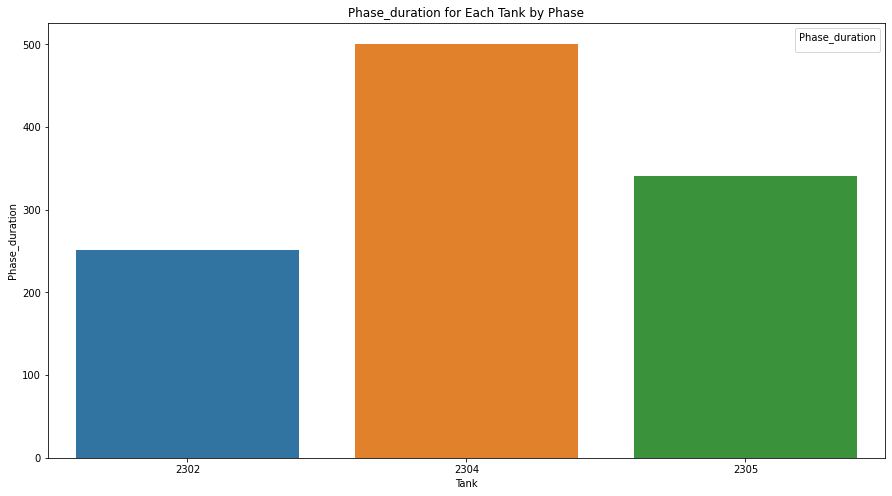

   Tank_1  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0    2302   1397022              50            0.0                  1   
1    2302   1428047             242            2.0                 28   
2    2302   1451704              60            0.0               4719   
3    2302   1451710             190            0.0                  2   
4    2302   1520984             302            1.0                  3   
5    2302   1567195             180            0.0                  3   
6    2302   1648637             153            3.0               4240   
7    2302   1698522             270            0.0               3124   
8    2302   1775253             817            7.0               2768   
9    2304   1428047             244            4.0                  2   
10   2304   1451710             476            1.0                  7   
11   2304   1567195              91            1.0                  1   
12   2304   1698522             335            2.0 

In [10]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)
specific_tanks = ['2301','2302','2304','2305']

# Filter the dataframe for desired instruction steps
desired_steps = ['STEP1_AGITATION', 'STEP2_AGITATION','STEP3_AGITATION']
filtered_data = data[(data['Instruction_Step'].isin(desired_steps)) & (data['Tank_1'].isin(specific_tanks))]



# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'Material'])['Phase_duration'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))

# Visualization using bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=total_durations, x='Tank_1', y='Phase_duration',ci=None)
plt.title('Phase_duration for Each Tank by Phase')
plt.ylabel('Phase_duration')
plt.xlabel('Tank')
plt.legend(title='Phase_duration')
plt.show()

#Aggregate data per tank
aggregated_total_durations_df3 = filtered_data.groupby(['Tank_1','Material']).agg({
  #  'BATCHID': 'count',
    # 'Material': 'count',
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()

 #Print the aggregated DataFrame
print(aggregated_total_durations_df3)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


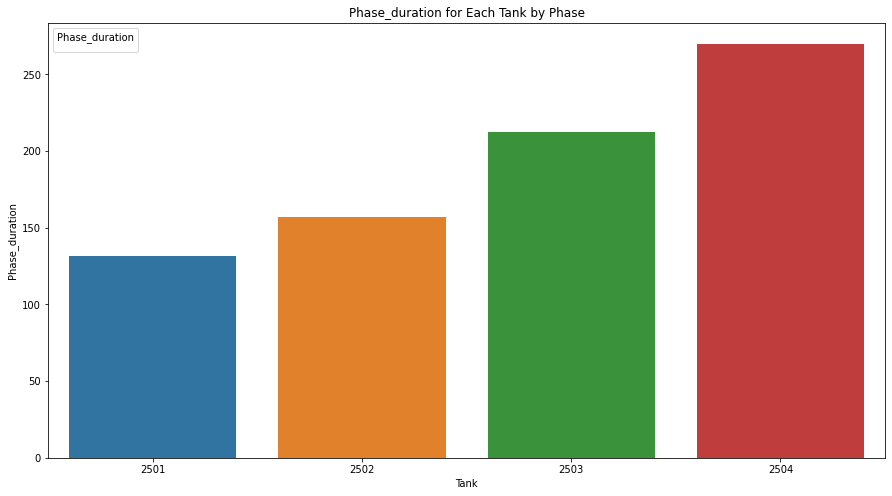

   Tank_1  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0    2501   1006884              50            0.0                  1   
1    2501   1172415              75            0.0                  0   
2    2501   1397022              50            0.0                  1   
3    2501   1486042              50            0.0                  2   
4    2501   1520984               0            0.0                  3   
5    2501   1521498              60            0.0                  2   
6    2501   1529065             151            1.0                  1   
7    2501   1552603              50            0.0                  2   
8    2501   1607495              91            1.0                  2   
9    2501   1648718             150            0.0                  4   
10   2501   1756358             859            4.0                 11   
11   2501   1875468              52            2.0                  0   
12   2501   1880112             181            1.0 

In [31]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank) 


specific_tanks = ['2501', '2502', '2503','2504']

# Filter the dataframe for desired instruction steps
desired_steps = ['STEP1_AGITATION', 'STEP2_AGITATION','STEP3_AGITATION']
filtered_data = data[(data['Instruction_Step'].isin(desired_steps)) & (data['Tank_1'].isin(specific_tanks))]



# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'Material'])['Phase_duration'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))

# Visualization using bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=total_durations, x='Tank_1', y='Phase_duration',ci=None)
plt.title('Phase_duration for Each Tank by Phase')
plt.ylabel('Phase_duration')
plt.xlabel('Tank')
plt.legend(title='Phase_duration')
plt.show()

#Aggregate data per tank
aggregated_total_durations_df4 = filtered_data.groupby(['Tank_1','Material']).agg({
  #  'BATCHID': 'count',
    # 'Material': 'count',
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()

 #Print the aggregated DataFrame
print(aggregated_total_durations_df4)


In [32]:
# Define columns where you want to detect and remove outliers
ProductionTank_df = pd.DataFrame(aggregated_total_durations_df4)
ProductionTank_df
columns_to_check = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN', 'Target_Phase_duration']

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column, iqr_multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each column
for col in columns_to_check:
    ProductionTank_df = remove_outliers_iqr(ProductionTank_df, col)
# Display the cleaned DataFrame
print(ProductionTank_df)

   Tank_1  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0    2501   1006884              50            0.0                  1   
1    2501   1172415              75            0.0                  0   
2    2501   1397022              50            0.0                  1   
3    2501   1486042              50            0.0                  2   
4    2501   1520984               0            0.0                  3   
5    2501   1521498              60            0.0                  2   
6    2501   1529065             151            1.0                  1   
7    2501   1552603              50            0.0                  2   
8    2501   1607495              91            1.0                  2   
9    2501   1648718             150            0.0                  4   
11   2501   1875468              52            2.0                  0   
12   2501   1880112             181            1.0                  2   
13   2501   1974017              90            0.0 

In [35]:
# Scaling numerical variables (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN']
print(ProductionTank_df)[numerical_cols] = scaler.fit_transform(print(ProductionTank_df)[numerical_cols])
print(print(ProductionTank_df).head())

   Tank_1  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0    2501   1006884              50            0.0                  1   
1    2501   1172415              75            0.0                  0   
2    2501   1397022              50            0.0                  1   
3    2501   1486042              50            0.0                  2   
4    2501   1520984               0            0.0                  3   
5    2501   1521498              60            0.0                  2   
6    2501   1529065             151            1.0                  1   
7    2501   1552603              50            0.0                  2   
8    2501   1607495              91            1.0                  2   
9    2501   1648718             150            0.0                  4   
11   2501   1875468              52            2.0                  0   
12   2501   1880112             181            1.0                  2   
13   2501   1974017              90            0.0 

TypeError: 'NoneType' object is not subscriptable

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (replace 'ProductionTank2203_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank_df)

# Define features and target
X = df.drop(['Phase_overrun','Target_Flowrate'], axis=1)
y = df['Phase_overrun']

# Define features and target
#X = df.drop(['Phase_overrun','Flowrate_KGMIN','Target_Phase_duration','Target_Flowrate','Phase_start_delay'], axis=1)
#y = df['Phase_overrun']



# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred_train = ridge_model.predict(X_train)
ridge_pred_test = ridge_model.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred_train = lasso_model.predict(X_train)
lasso_pred_test = lasso_model.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)

# RandomForest Regressor
#rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)

# Gradient Boosting Regressor
#gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.05, max_depth=5, subsample=0.8, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred_train = gb_model.predict(X_train)
gb_pred_test = gb_model.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)


# Decision Tree Regressor
#dt_model = DecisionTreeRegressor(random_state=42)
dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42)
dt_model.fit(X_train, y_train)
dt_pred_train = dt_model.predict(X_train)
dt_pred_test = dt_model.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)

# Bagging Regressor (based on Decision Trees by default)
bag_model = BaggingRegressor(n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)
bag_pred_train = bag_model.predict(X_train)
bag_pred_test = bag_model.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)

# AdaBoost Regressor
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred_train = ada_model.predict(X_train)
ada_pred_test = ada_model.predict(X_test)
ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)

# Extra Trees Regressor
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)
et_pred_train = et_model.predict(X_train)
et_pred_test = et_model.predict(X_test)
et_train_mse = mean_squared_error(y_train, et_pred_train)
et_test_mse = mean_squared_error(y_test, et_pred_test)
et_train_r2 = r2_score(y_train, et_pred_train)
et_test_r2 = r2_score(y_test, et_pred_test)
results_df = results_df.append({'Model': 'Extra Trees Regressor', 'Train MSE': et_train_mse, 'Test MSE': et_test_mse, 'Train R2': et_train_r2, 'Test R2': et_test_r2}, ignore_index=True)


# Print the results DataFrame
print(results_df)

                         Model  Train MSE  Test MSE  Train R2   Test R2
0            Linear Regression   0.367254  0.401660  0.172455  0.149426
1             Ridge Regression   0.367330  0.397788  0.172284  0.157626
2             Lasso Regression   0.418746  0.454351  0.056425  0.037845
3      Random Forest Regressor   0.195725  0.395498  0.558966  0.162475
4  Gradient Boosting Regressor   0.009965  0.333085  0.977545  0.294643
5      Decision Tree Regressor   0.216880  0.295696  0.511296  0.373820
6            Bagging Regressor   0.059477  0.329661  0.865979  0.301894
7           AdaBoost Regressor   0.000000  0.412893  1.000000  0.125638
8        Extra Trees Regressor   0.000000  0.380628  1.000000  0.193965
